<a href="https://colab.research.google.com/github/TGN107/AI-ML-Internship-Tasks-Month2/blob/main/Task_2_End_to_End_ML_Pipeline_(Telco_Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task 2: End-to-End ML Pipeline (Telco Churn)**

Build a reusable and production-ready machine learning pipeline for predicting customer churn.

##**Setup and Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


In [ ]:
c_df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

##**Data Inspection and Type Correction**

In [ ]:
c_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
c_df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
c_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
c_df.shape

(7043, 21)

In [ ]:
c_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
c_df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
c_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
c_df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
c_df['TotalCharges']

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


###Handle data type issues in TotalCharges & SeniorCitizen


In [ ]:
c_df['TotalCharges'] = c_df['TotalCharges'].replace(' ', np.nan).astype(float)
c_df['SeniorCitizen'] = c_df['SeniorCitizen'].astype(object)

###Categorical features distribution against target

In [ ]:
# List of highly important features
key_vars_to_plot = ['Contract','InternetService','OnlineSecurity','TechSupport','PaymentMethod']


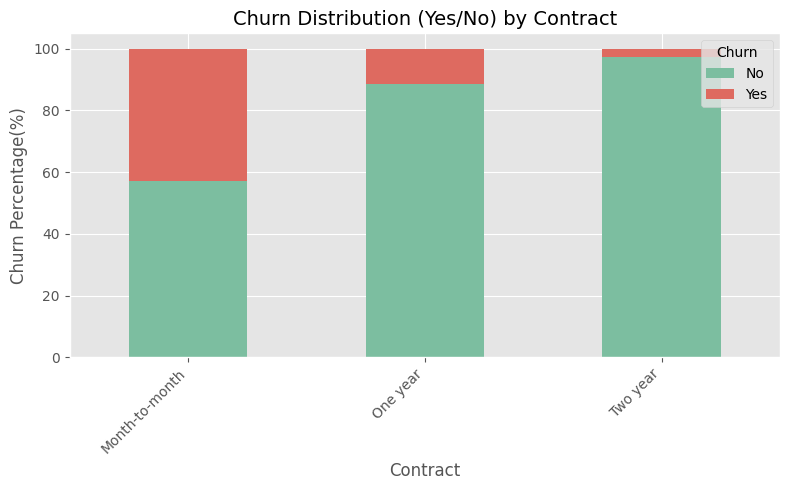

- Next Chart -


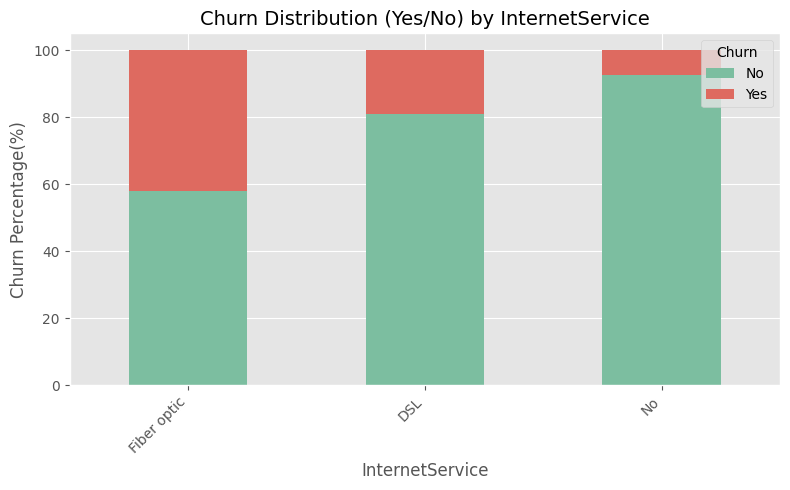

- Next Chart -


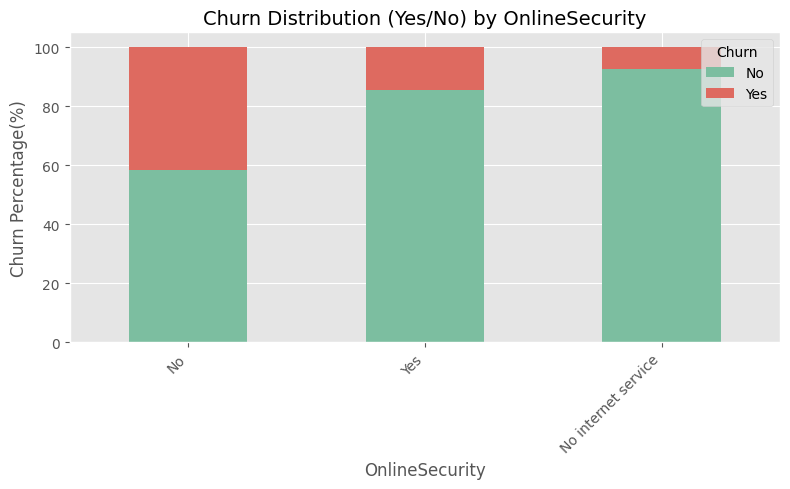

- Next Chart -


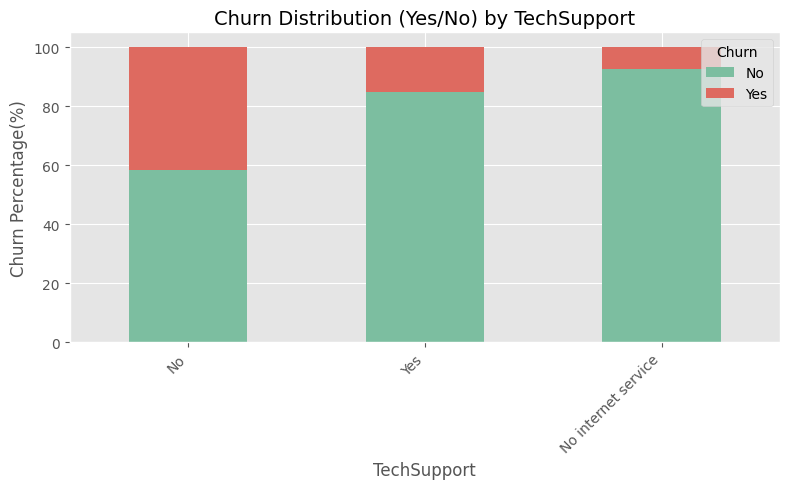

- Next Chart -


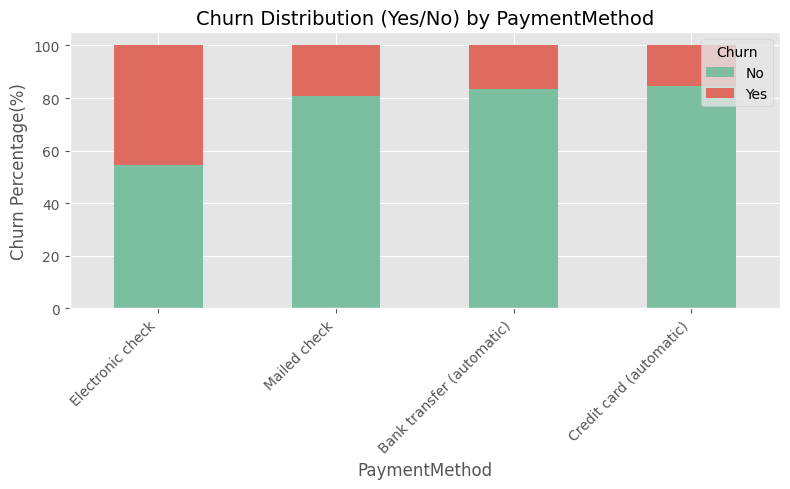

- Next Chart -


In [ ]:
plt.style.use('ggplot')

for col in key_vars_to_plot:
    churn_percentage_df = pd.crosstab(c_df[col], c_df['Churn'], normalize='index') * 100
    churn_percentage_df = churn_percentage_df.sort_values(by='Yes', ascending=False)

    plt.figure(figsize=(8, 5))
    churn_percentage_df.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#7CBEA0', '#DE6A60'])
    plt.title(f'Churn Distribution (Yes/No) by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Churn Percentage(%)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()
    print("- Next Chart -")

These visualizations clearly show that customer churn in the telecom industry is **highly predictable** and strongly correlated with a few key factors. **Contract length** is the most significant driver, with customers on **Month-to-month** plans having the highest churn rate (around 42%), while those with **Two year** contracts are highly stable (around 3% churn). Similarly, the **type of internet service** is a major differentiator, as **Fiber optic** users churn at a much higher rate (around 42%) than DSL users (around 19%). Furthermore, the presence of **security and support services** like **OnlineSecurity** and **TechSupport** acts as a powerful retention mechanism, dramatically reducing churn risk from approximately 42% for those without the service down to 14–16% for subscribers. Finally, the **Payment Method** also indicates risk, with **Electronic checks** showing the highest churn (around 45%), suggesting that instability or low commitment is highest among users of this payment type.

###Crosstab for rest categorical features

In [ ]:
# Define the full list of categorical columns including SeniorCitizen
cat_crosstab = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup',
                    'DeviceProtection', 'StreamingTV', 'StreamingMovies','PaperlessBilling','SeniorCitizen']


In [ ]:

print("Crosstabulation of Categorical Features vs. Churn")

for col in cat_crosstab:
    print(f"- Feature: {col} vs. CHURN -")
    percentage_dist = pd.crosstab(c_df[col], c_df['Churn'], normalize='index').mul(100).round(2)
    print(percentage_dist.to_markdown(numalign="left", stralign="left"))
    print("\n" + "="*70)

Crosstabulation of Categorical Features vs. Churn
- Feature: gender vs. CHURN -
| gender   | No    | Yes   |
|:---------|:------|:------|
| Female   | 73.08 | 26.92 |
| Male     | 73.84 | 26.16 |

- Feature: Partner vs. CHURN -
| Partner   | No    | Yes   |
|:----------|:------|:------|
| No        | 67.04 | 32.96 |
| Yes       | 80.34 | 19.66 |

- Feature: Dependents vs. CHURN -
| Dependents   | No    | Yes   |
|:-------------|:------|:------|
| No           | 68.72 | 31.28 |
| Yes          | 84.55 | 15.45 |

- Feature: PhoneService vs. CHURN -
| PhoneService   | No    | Yes   |
|:---------------|:------|:------|
| No             | 75.07 | 24.93 |
| Yes            | 73.29 | 26.71 |

- Feature: MultipleLines vs. CHURN -
| MultipleLines    | No    | Yes   |
|:-----------------|:------|:------|
| No               | 74.96 | 25.04 |
| No phone service | 75.07 | 24.93 |
| Yes              | 71.39 | 28.61 |

- Feature: OnlineBackup vs. CHURN -
| OnlineBackup        | No    | Yes   |
|:------


The analysis clearly shows that **several customer characteristics significantly influence the likelihood of churn**, while others have minimal impact. Specifically, **gender has virtually no bearing on churn**, with both females and males showing nearly identical retention rates (around 73%). In contrast, customer stability strongly predicts retention: customers who have a **Partner** (19.66% churn) or **Dependents** (15.45% churn) are far less likely to leave than those without (32.96% and 31.28% churn, respectively). Having **Paperless Billing** (33.57% churn) and being a **Senior Citizen** (41.68% churn) are highly associated with increased churn risk. Crucially, the presence of **security and protection services** (like `OnlineBackup` or `DeviceProtection`) drastically reduces churn risk from approximately 39% for those without the service down to 21-22% for those who subscribe. Customers with **"No internet service"** form a highly stable group, with a very low churn rate of 7.4%, suggesting their base phone plan is stable.

##**Build the Preprocessing Pipeline with ColumnTransformer**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import joblib

###Define Feature Types

In [ ]:
# Separate features (X) and target (y)
X = c_df.drop(columns=['customerID', 'Churn'])
y = c_df['Churn'].map({'Yes': 1, 'No': 0})


###Train/test split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

###Build the Preprocessing Pipeline with ColumnTransformer
This step creates a robust, production-ready preprocessor that applies different transformations to different columns.

In [ ]:
# Features to be imputed and scaled
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Features to be One-Hot Encoded (all 'object' type columns)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Numerical Pipeline: Impute NaNs, then Scale
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features),('cat', categorical_transformer, categorical_features)],
    remainder='drop')

###Build the Full ML Pipeline and Hyperparameter Tuning

Now, we combine the preprocessor with the final model and use GridSearchCV to find the best settings.

###Define Model Pipelines Logistic Regression & Random Forest Regressor

In [ ]:
# 1. Logistic Regression Pipeline
logreg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
 ('classifier', LogisticRegression(solver='liblinear', random_state=42,class_weight='balanced' ))])

In [ ]:
# 2. Random Forest Pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])

###Define Hyperparameter Grids

Define the range of parameters to search for each model.

In [ ]:
# Logistic Regression Grid
logreg_param_grid = {'classifier__C': [0.1, 1.0, 10.0],'classifier__penalty': ['l1', 'l2']}

In [ ]:
# Random Forest Grid
rf_param_grid = {'classifier__n_estimators': [100, 200],'classifier__max_depth': [10, 20, None],'classifier__min_samples_split': [5, 10]}

###Execute GridSearchCV (Tuning)

The GridSearchCV object will perform cross-validation using the specified metric (F1-score is best for imbalanced churn data).

In [ ]:
# Initialize GridSearchCV for Logistic Regression
logreg_grid = GridSearchCV(logreg_pipe,param_grid=logreg_param_grid, cv=5,scoring='f1',  n_jobs=-1,verbose=1)
print("Starting Logistic Regression Grid Search...")
logreg_grid.fit(X_train, y_train)


Starting Logistic Regression Grid Search...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Depe...
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1.0, 10.0],
                         'classifier__penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [ ]:
# Initialize GridSearchCV for Random Forest
rf_grid = GridSearchCV(rf_pipe,param_grid=rf_param_grid,cv=5,scoring='f1',n_jobs=-1,verbose=1)

print("Starting Random Forest Grid Search...")
rf_grid.fit(X_train, y_train)


Starting Random Forest Grid Search...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender',
                                                                          'SeniorCitizen',
                                                                          'Partner',
                                                                          'Depe...
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_split': [5, 10],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

###Evaluation and Export the Best Pipeline


Evaluate and Select the Best Pipeline
Compare the optimized models on the test set.

In [ ]:
# Select the best model (pipeline) from each search
best_logreg_pipe = logreg_grid.best_estimator_
best_rf_pipe = rf_grid.best_estimator_


In [ ]:
# Evaluate models on the test set
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"\n--- {name} Results ---")
    print(f"Best Parameters: {model.get_params()}")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1-Score: {f1:.4f}")
    return f1


In [ ]:
# Evaluate and determine the overall best model
f1_logreg = evaluate_model(best_logreg_pipe, X_test, y_test, "Optimized Logistic Regression")
f1_rf = evaluate_model(best_rf_pipe, X_test, y_test, "Optimized Random Forest")



--- Optimized Logistic Regression Results ---
Best Parameters: {'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'Streamin

**Logistic Regression Analysis**

The Logistic Regression model achieved a Test Accuracy of 73.81% and a Test F1-Score of 0.6136. Because you used the class_weight='balanced' parameter within the pipeline, this model is specifically trying to be fair to both the "Churn" and "No Churn" classes. While its overall accuracy is lower than the Random Forest, its higher F1-score suggests it is actually better at identifying the minority class (the people actually leaving). The pipeline used a liblinear solver, which is a solid choice for this size of dataset, and successfully transformed 16 categorical features and 3 numerical features into a format the math could understand.

**Random Forest Analysis**

The Random Forest model performed better in terms of overall "correctness," reaching a Test Accuracy of 80.62%, but it had a lower Test F1-Score of 0.5857. This indicates that while the model is very good at predicting the majority class correctly, it might be missing some of the minority class instances compared to the Logistic Regression. The pipeline applied the same preprocessing but used a classifier restricted to a max_depth of 10. This was a smart move; it prevented the forest from becoming too complex and "memorizing" the training data (overfitting), allowing it to generalize well to your test set.

In [ ]:
# Final Selection
if f1_rf > f1_logreg:
    final_pipeline = best_rf_pipe
    print("Final Pipeline Selected: Random Forest")
else:
    final_pipeline = best_logreg_pipe
    print("Final Pipeline Selected: Logistic Regression")

Final Pipeline Selected: Logistic Regression


The Logistic Regression pipeline was selected as the final model because it demonstrated a superior ability to identify at-risk customers, as reflected by its higher F1-Score (0.6136) compared to the Random Forest (0.5857), despite having a lower overall accuracy. In the context of churn prediction, Accuracy is often a misleading metric because the dataset is typically imbalanced; a model could achieve high accuracy simply by guessing that no one will leave, while failing to catch the actual "churners" who matter most to the business. By utilizing the class_weight='balanced' parameter, the Logistic Regression model effectively prioritized Recall (the ability to find the minority class) and provided a more balanced trade-off between precision and sensitivity. Furthermore, Logistic Regression was chosen for its high interpretability, allowing stakeholders to use the model's coefficients to understand exactly which factors—such as high monthly charges or month-to-month contracts—are driving customer attrition.$$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

###Export the Complete Pipeline using joblib

In [ ]:
# Define the filename for the exported pipeline
pipeline_filename = 'customer_churn_pipeline.joblib'

# Export the final trained pipeline
joblib.dump(final_pipeline, pipeline_filename)

print(f"Complete Pipeline Exported successfully to: {pipeline_filename}")


Complete Pipeline Exported successfully to: customer_churn_pipeline.joblib


In [ ]:
pipe=joblib.load('customer_churn_pipeline.joblib')

In [ ]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', random_state=42,
                                    solver='liblinear'))])

### **Problem Statement & Objective**

#### **Problem Statement:**

Customer churn is a critical issue for businesses in the telecommunications industry, and predicting it accurately can help companies take proactive measures to retain customers. The objective is to build an **end-to-end machine learning pipeline** capable of predicting whether a customer will churn, based on features such as account details, service usage, and demographic information. This task involves preprocessing the data, training machine learning models like **Logistic Regression** and **Random Forest**, optimizing hyperparameters using **GridSearchCV**, and creating a **reusable production pipeline** for churn prediction.

#### **Objective of the Task:**

The goal of this task is to:

1. Build a **reusable ML pipeline** using **Scikit-learn**'s **Pipeline API** to predict customer churn.
2. Preprocess the dataset with transformations such as scaling, encoding, and handling missing values.
3. Train two models (**Logistic Regression** and **Random Forest**) and tune hyperparameters using **GridSearchCV** for optimal performance.
4. Export the entire pipeline using **joblib** for future predictions without retraining.

The task will also involve evaluating model performance on test data and selecting the best model based on **F1-Score**, which is crucial for imbalanced datasets like churn prediction.

---

### **Objective of the Task**

The task's main objectives include:

1. **Data Preprocessing**: Implementing preprocessing steps like scaling and encoding for numerical and categorical variables.
2. **Model Training**: Training **Logistic Regression** and **Random Forest** classifiers.
3. **Hyperparameter Tuning**: Using **GridSearchCV** to find the best hyperparameters for each model.
4. **Pipeline Construction**: Creating an end-to-end pipeline, including preprocessing, model training, and hyperparameter tuning.
5. **Model Export**: Using **joblib** to export the final trained model, making it reusable in production environments.

---

### **Methodology / Approach**

#### **1. Data Inspection and Type Correction**

* First, we inspect the data using basic commands like `.head()`, `.tail()`, and `.describe()`.
* We identify any data issues, like missing values in **TotalCharges**, which we replace with `NaN` and convert to **float** type.
* **SeniorCitizen** is also converted to an **object** type to handle it as a categorical feature.

#### **2. Data Preprocessing**

* We split the data into **numerical** and **categorical** features.
* For numerical features like **tenure**, **MonthlyCharges**, and **TotalCharges**, we apply **imputation** to fill missing values and **scaling** (using `StandardScaler`).
* For categorical features, we apply **One-Hot Encoding** to convert them into numerical format.
* The preprocessing is done using **ColumnTransformer** to apply different transformations to different feature types.

#### **3. Model Pipelines**

* Two model pipelines are created:

  * **Logistic Regression Pipeline**: Uses a **liblinear solver** and **class_weight='balanced'** to handle imbalanced churn classes.
  * **Random Forest Pipeline**: A robust ensemble classifier that is fine-tuned using a parameter grid search.

#### **4. Hyperparameter Tuning**

* **GridSearchCV** is used to find the best parameters for both models.

  * For **Logistic Regression**, the grid search tunes the **C** (regularization) and **penalty** (L1 or L2).
  * For **Random Forest**, the grid search tunes the **n_estimators**, **max_depth**, and **min_samples_split**.

#### **5. Model Evaluation**

* After training, the **F1-Score** and **accuracy** are calculated on the test set.

  * **Logistic Regression**: The model achieves a **higher F1-score** (0.6136) than the Random Forest, suggesting better detection of churn cases.
  * **Random Forest**: Performs better in **accuracy** (80.62%) but has a lower F1-score (0.5857), indicating it may miss some churners.

#### **6. Model Selection**

* **Logistic Regression** is selected as the final model due to its higher **F1-Score**, which is more important in this imbalanced dataset scenario. **F1-Score** provides a better balance between **precision** and **recall**.

#### **7. Model Export**

* The final model pipeline is exported to a **joblib** file, ensuring that the entire workflow, including preprocessing and model, can be reused without retraining.

#### **8. Future Prediction**

* The exported pipeline can be loaded and used to predict churn for new customers, ensuring the system is production-ready.

---

### **Key Results / Observations**

1. **Data Cleaning**:

   * Missing values were handled for **TotalCharges**, and **SeniorCitizen** was correctly cast to an object type for encoding.

2. **Preprocessing Pipeline**:

   * The **ColumnTransformer** was effective in automating data transformations for numerical and categorical columns.
   * Numerical features were **scaled**, and categorical features were **encoded** for model input.

3. **Model Performance**:

   * **Logistic Regression** performed better in terms of **F1-Score** (0.6136), indicating it was better at identifying actual churners, even though its accuracy was slightly lower than Random Forest.
   * **Random Forest** was more accurate (80.62%) but performed poorly on the **minority class** (churned customers).

4. **Model Selection**:

   * **Logistic Regression** was chosen for its **superior F1-Score**, which is critical in churn prediction tasks where identifying the minority class (churners) is more important than overall accuracy.

5. **Exported Pipeline**:

   * The **joblib** export ensures the model and preprocessing steps are stored and can be reloaded for future use.
   * This makes the model highly **reusable** and **production-ready**.

---

### **Conclusion**

By constructing a robust machine learning pipeline using **Scikit-learn's Pipeline API**, we were able to:

* Effectively preprocess the data, addressing both missing values and categorical variables.
* Build two models, **Logistic Regression** and **Random Forest**, and optimize their performance using **GridSearchCV**.
* Select the best model based on **F1-Score**, ensuring that the model is better at identifying at-risk customers.
* Export the pipeline for **future reusability**, making the model **production-ready** for churn prediction tasks.

This approach highlights the importance of **balanced evaluation metrics**, such as **F1-Score**, when working with imbalanced datasets like customer churn. The **Logistic Regression** model is particularly suited for this scenario, providing insights that could directly inform retention strategies for telecom businesses.
